In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep

from sklearn.linear_model import LinearRegression

In [2]:
# step 1: Fetch S&P500 tickers from Wiki
def get_sp500_tickers():
    url="https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    sp500_table = pd.read_html(url)[0]
    return sp500_table['Symbol'].tolist()

sp500_tickers = get_sp500_tickers()
sp500_tickers[:5]

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN']

In [3]:
# Step 2: Download historical prices for S&P 500 tickers
def download_prices_in_batches(tickers, batch_size=20, start="2024-01-01", end="2025-01-01"):
    all_data = []
    for i in range(0, len(tickers), batch_size):
        batch = tickers[i:i + batch_size]
        try:
            data = yf.download(batch, start=start, end=end)["Adj Close"]
            all_data.append(data)
        except Exception as e:
            print(f"Error fetching batch {batch}: {e}")
        sleep(1) # Pause to avoid rate-limiting issue
    return pd.concat(all_data, axis=1)

data = download_prices_in_batches(sp500_tickers)

data = data.dropna(how="any", axis=1)
data

[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  20 of 20 completed

2 Failed downloads:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-01-01 -> 2025-01-01)')
[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  20 of 20 completed
[**************

Ticker,A,ABBV,ABNB,ABT,ACN,ADBE,AES,AFL,AKAM,ALB,...,WST,WTW,WY,WYNN,XEL,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,137.793900,154.183807,134.479996,107.700714,341.431335,580.070007,18.576107,81.522545,116.879997,144.644821,...,347.860382,236.998978,33.775772,93.573265,61.121792,112.429237,126.512314,120.354469,267.980011,194.642258
2024-01-03,130.256210,154.801224,133.419998,107.377174,332.573761,571.789978,18.182304,81.434441,116.309998,138.037384,...,337.465149,237.670609,33.067051,93.009445,61.227722,110.342278,126.580956,119.442307,252.520004,191.037933
2024-01-04,130.097305,155.765961,133.720001,108.808617,331.756897,567.049988,18.124672,80.563225,114.629997,133.852341,...,339.510315,236.544647,32.610756,93.187500,61.372169,111.103867,126.178947,119.174614,252.970001,192.137039
2024-01-05,129.660324,156.421967,135.979996,108.632126,331.294281,564.599976,18.057436,80.974365,114.330002,133.753860,...,338.672302,235.932266,32.698132,94.611870,61.372169,110.925835,125.835785,118.956505,252.690002,192.939117
2024-01-08,132.460907,155.737000,140.080002,110.200829,334.965332,580.549988,18.316771,81.121201,115.989998,134.492416,...,351.012848,239.191666,33.057343,95.996666,61.227722,111.618187,126.129929,120.929512,261.089996,194.226349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,135.848907,180.000000,134.990005,114.760002,361.630005,447.940002,13.020000,103.239998,96.910004,89.989998,...,332.769989,315.142151,28.260000,88.779999,67.649513,118.150002,135.000000,107.059036,395.440002,164.699997
2024-12-26,135.579407,179.199997,135.320007,115.269997,360.429993,450.160004,12.840000,103.660004,97.959999,89.150002,...,333.429993,316.976990,28.170000,89.309998,67.619759,118.470001,136.000000,107.009148,396.850006,165.520004
2024-12-27,135.289932,178.009995,133.384995,114.989998,356.179993,446.480011,12.750000,103.379997,96.970001,88.290001,...,333.220001,315.421387,27.990000,88.680000,67.580086,117.529999,135.229996,106.630005,389.070007,164.600006


In [4]:
# Step 3: nORMALIZE PRICES USING Z-scores
def normalize_prices(prices):
    return (prices - prices.mean()) / prices.std()

normalized_prices = normalize_prices(data)

normalized_prices.head()

Ticker,A,ABBV,ABNB,ABT,ACN,ADBE,AES,AFL,AKAM,ALB,...,WST,WTW,WY,WYNN,XEL,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,0.112042,-1.561411,-0.535295,-0.547242,0.144141,1.181320,0.884343,-0.996756,1.594589,2.414994,...,0.389524,-1.678733,1.374938,0.194912,0.459212,-1.932850,-1.807944,0.797347,-1.207466,1.420411
2024-01-03,-1.076499,-1.514738,-0.610867,-0.608723,-0.182595,1.004207,0.692354,-1.003816,1.534581,1.998523,...,0.069775,-1.649204,0.997102,0.129895,0.476614,-2.182081,-1.790118,0.682096,-1.537751,1.105096
2024-01-04,-1.101556,-1.441812,-0.589478,-0.336708,-0.212728,0.902816,0.664257,-1.073633,1.357717,1.734737,...,0.132683,-1.698708,0.753840,0.150427,0.500344,-2.091130,-1.894520,0.648274,-1.528138,1.201249
2024-01-05,-1.170459,-1.392222,-0.428354,-0.370247,-0.229793,0.850410,0.631478,-1.040685,1.326134,1.728530,...,0.106906,-1.725633,0.800422,0.314678,0.500344,-2.112391,-1.983640,0.620716,-1.534119,1.271416
2024-01-08,-0.728863,-1.444001,-0.136047,-0.072148,-0.094376,1.191587,0.757910,-1.028919,1.500893,1.775081,...,0.486491,-1.582328,0.991926,0.474366,0.476614,-2.029708,-1.907250,0.870002,-1.354663,1.384027


In [5]:
# Step 4: Calculate pairwise Euclidean distances
def calculate_distances(normalized_data):
    distances = {}
    assets = normalized_data.columns
    for i in range(len(assets)):
        for j in range(i+1, len(assets)):
            asset1 = assets[i]
            asset2 = assets[j]
            distance = np.sqrt(np.sum((normalized_data[asset1] - normalized_data[asset2])**2))
            distances[f"{asset1}-{asset2}"] = distance
    return distances

distances = calculate_distances(normalized_prices)


In [6]:
# Step 5: Create a DataFrame of distances and sort
distances_df = pd.DataFrame(distances.items(), columns=["Pair", "Distance"]).sort_values(by="Distance")

# Display the closest pairs
print("Closet Pairs by Distance:")
print(distances_df.head())

Closet Pairs by Distance:
              Pair  Distance
8333    GOOGL-GOOG  0.248646
79500     FOX-FOXA  0.782792
73226     EVRG-PPL  1.991097
99210      KMI-WMB  2.020806
115518      PNC-RF  2.038031


In [7]:
# Plot the normalized prices of the closest pairs
def plot_closest_pairs_and_spread(normalized_data, distance_df, num_pairs=5):
    top_pairs = distances_df.head(num_pairs)
    plt.figure(figsize=(16, 20))
    for i, pair in enumerate(top_pairs["Pair"]):
        stock1, stock2 = pair.split('-')
        # Calculate hedge ratio using linear regression
        X = normalized_data[stock2].values.reshape(-1, 1)
        y = normalized_data[stock1].values
        model = LinearRegression().fit(X, y)
        hedge_ratio = float(model.coef_[0])

        # Calculate the spread
        spread = normalized_data[stock1] - hedge_ratio * normalized_data[stock2]
        spread_mean = spread.mean()
        spread_std = spread.std()

        # Plot normalized prices
        plt.subplot(num_pairs, 2, 2 * i + 1)
        plt.plot(normalized_data[stock1], label=f"{stock1}")
        plt.plot(normalized_data[stock2], label=f"{stock2}")
        plt.title(f"Normalized Prices: {stock1} vs {stock2}", fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(True)

        # Plot the spread
        plt.subplot(num_pairs, 2, 2 * i + 2)
        plt.plot(spread, label="Spread", color="purple")
        plt.axhline(spread_mean, color="red", linestyle="--", label="Mean")
        plt.axhline(spread_mean + 2 * spread_std, color="green", linestyle="--", label="+2 Std")
        plt.axhline(spread_mean - 2 * spread_std, color="green", linestyle="--", label="-2 Std")
        plt.title(f"Spread: {stock1} - {hedge_ratio:.2f} * {stock2}", fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(True)

    plt.tight_layout()
    plt.show()

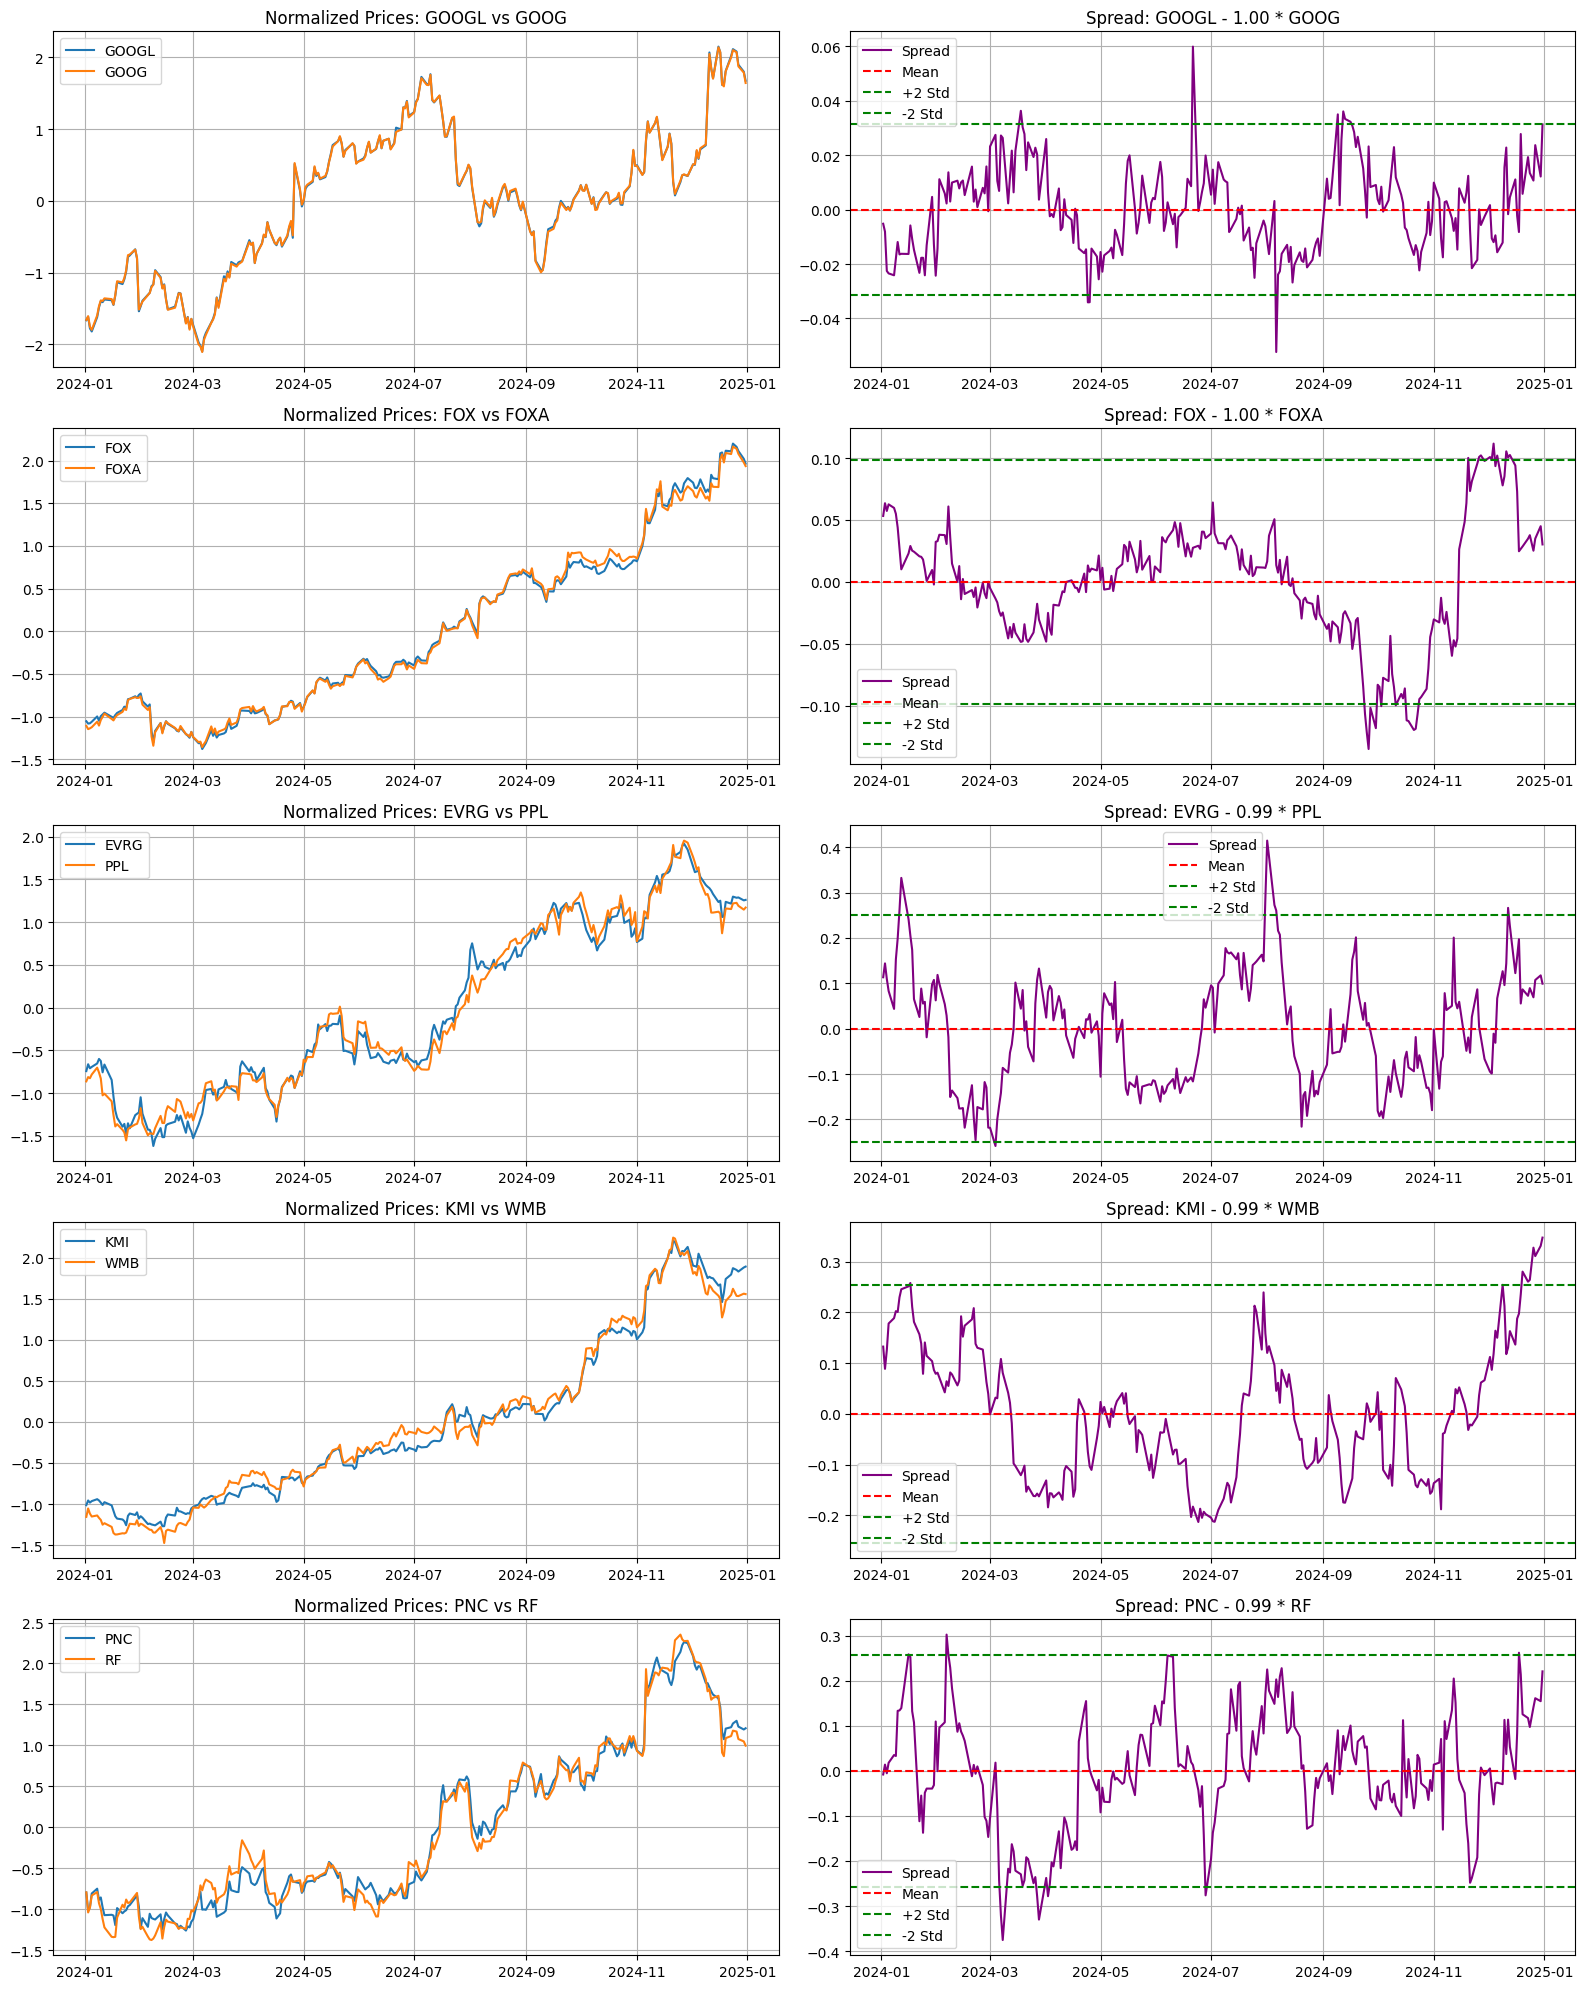

In [8]:
plot_closest_pairs_and_spread(normalized_prices, distances_df)

In [10]:
# Function to calculate long/short quantities
def calculate_long_short_quantities(normalized_data, pair, capital=10000):
    stock1, stock2 = pair.split('-')

    # Linear regression to calculate hedge ratio
    X = normalized_data[stock2].values.reshape(-1, 1)
    y = normalized_data[stock1].values
    model = LinearRegression().fit(X, y)
    hedge_ratio = float(model.coef_[0])

    # Get the latest prices
    price1 = normalized_data[stock1].iloc[-1]
    price2 = normalized_data[stock2].iloc[-1]

    # Allocate capital
    capital_stock1 = capital
    capital_stock2 = capital * hedge_ratio

    # Calculate number of shares
    shares_stock1 = capital_stock1 / price1
    shares_stock2 = capital_stock2 / price2

    return {
        "stock1": stock1,
        "long_shares": shares_stock1,
        "price1": price1,
        "stock2": stock2,
        "short_shares": shares_stock2,
        "price2": price2,
        "hedge_ratio": hedge_ratio
    }

# Example usage
for i, pair in enumerate(distances_df["Pair"].head(5)):
    positions = calculate_long_short_quantities(normalized_prices, pair, capital=10000)

    print(f"Pair: {positions['stock1']} (long) and {positions['stock2']} (short)")
    print(f"  Long {positions['long_shares']:.2f} shares of {positions['stock1']} at ${positions['price1']:.2f}")
    print(f"  Short {positions['short_shares']:.2f} shares of {positions['stock2']} at ${positions['price2']:.2f}")
    print(f"  Hedge Ratio: {positions['hedge_ratio']:.2f}\n")

Pair: GOOGL (long) and GOOG (short)
  Long 5973.07 shares of GOOGL at $1.67
  Short 6085.48 shares of GOOG at $1.64
  Hedge Ratio: 1.00

Pair: FOX (long) and FOXA (short)
  Long 5091.33 shares of FOX at $1.96
  Short 5158.35 shares of FOXA at $1.94
  Hedge Ratio: 1.00

Pair: EVRG (long) and PPL (short)
  Long 7931.77 shares of EVRG at $1.26
  Short 8473.67 shares of PPL at $1.17
  Hedge Ratio: 0.99

Pair: KMI (long) and WMB (short)
  Long 5292.10 shares of KMI at $1.89
  Short 6380.36 shares of WMB at $1.55
  Hedge Ratio: 0.99

Pair: PNC (long) and RF (short)
  Long 8272.26 shares of PNC at $1.21
  Short 9952.37 shares of RF at $1.00
  Hedge Ratio: 0.99



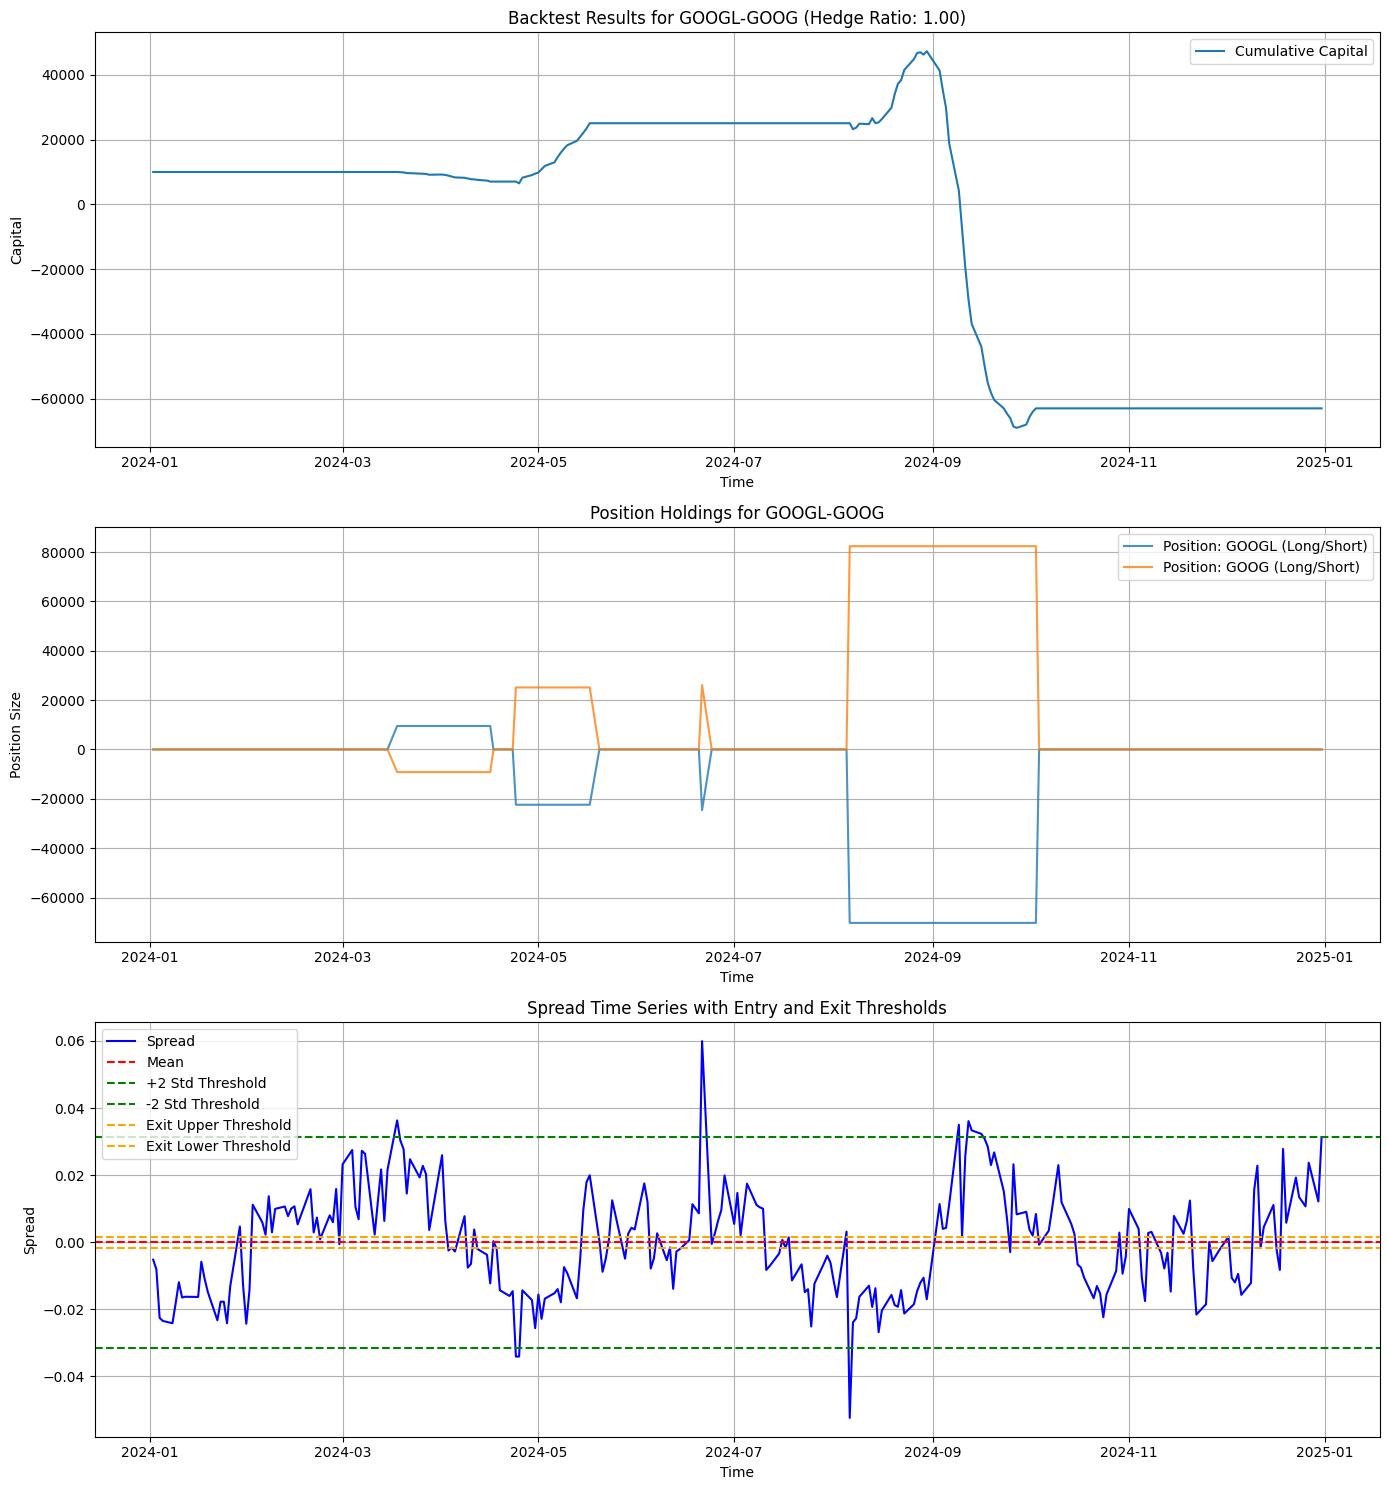

In [15]:
def backtest_pairs_trading(normalized_data, pair, initial_capital=10000):
    stock1, stock2 = pair.split('-')

    # Calculate hedge ratio using linear regression
    X = normalized_data[stock2].values.reshape(-1, 1)
    y = normalized_data[stock1].values
    model = LinearRegression().fit(X, y)
    hedge_ratio = float(model.coef_[0])

    # Calculate spread
    spread = normalized_data[stock1] - hedge_ratio * normalized_data[stock2]
    spread_mean = spread.mean()
    spread_std = spread.std()

    # Trading rules
    entry_threshold = 2 * spread_std
    exit_threshold = 0.1 * spread_std  # Exit when close to the mean (e.g., 10% of std)

    # Initialize variables
    capital = initial_capital
    positions = {"stock1": 0, "stock2": 0}
    pnl = []
    daily_capital = []
    position_holding = []  # Track positions over time

    for i in range(len(spread)):
        # Recalculate positions dynamically based on current capital
        if spread[i] > spread_mean + entry_threshold:  # Short spread
            if positions["stock1"] == 0 and positions["stock2"] == 0:
                positions["stock1"] = -capital / normalized_data[stock1].iloc[i]
                positions["stock2"] = capital / (hedge_ratio * normalized_data[stock2].iloc[i])
        elif spread[i] < spread_mean - entry_threshold:  # Long spread
            if positions["stock1"] == 0 and positions["stock2"] == 0:
                positions["stock1"] = capital / normalized_data[stock1].iloc[i]
                positions["stock2"] = -capital / (hedge_ratio * normalized_data[stock2].iloc[i])
        elif positions["stock1"] != 0 and abs(spread[i] - spread_mean) < exit_threshold:
            # Close positions if the spread has returned to the mean
            positions["stock1"] = 0
            positions["stock2"] = 0

        # Calculate daily P&L
        stock1_value = positions["stock1"] * normalized_data[stock1].iloc[i]
        stock2_value = positions["stock2"] * normalized_data[stock2].iloc[i]
        daily_pnl = stock1_value + stock2_value
        pnl.append(daily_pnl)

        # Update capital with daily P&L
        capital = initial_capital + sum(pnl)
        daily_capital.append(capital)

        # Track current position sizes
        position_holding.append((positions["stock1"], positions["stock2"]))

    # Convert results to a DataFrame
    results = pd.DataFrame({
        "Spread": spread,
        "Capital": daily_capital,
        "PnL": pnl,
        "Position_Stock1": [p[0] for p in position_holding],
        "Position_Stock2": [p[1] for p in position_holding]
    })

    return results, model.coef_[0], spread_mean, spread_std, entry_threshold, exit_threshold


# Example backtest for the top pair
top_pair = distances_df["Pair"].iloc[0]
backtest_results, hedge_ratio, spread_mean, spread_std, entry_threshold, exit_threshold = backtest_pairs_trading(normalized_prices, top_pair)

# Plot the results
plt.figure(figsize=(14, 15))

# Plot 1: Cumulative Capital
plt.subplot(3, 1, 1)
plt.plot(backtest_results["Capital"], label="Cumulative Capital")
plt.title(f"Backtest Results for {top_pair} (Hedge Ratio: {hedge_ratio:.2f})")
plt.xlabel("Time")
plt.ylabel("Capital")
plt.legend()
plt.grid(True)

# Plot 2: Position Holdings
plt.subplot(3, 1, 2)
plt.plot(backtest_results["Position_Stock1"], label=f"Position: {top_pair.split('-')[0]} (Long/Short)", alpha=0.8)
plt.plot(backtest_results["Position_Stock2"], label=f"Position: {top_pair.split('-')[1]} (Long/Short)", alpha=0.8)
plt.title(f"Position Holdings for {top_pair}")
plt.xlabel("Time")
plt.ylabel("Position Size")
plt.legend()
plt.grid(True)

# Plot 3: Spread Time Series with Thresholds
plt.subplot(3, 1, 3)
plt.plot(backtest_results["Spread"], label="Spread", color="blue")
plt.axhline(spread_mean, color="red", linestyle="--", label="Mean")
plt.axhline(spread_mean + entry_threshold, color="green", linestyle="--", label="+2 Std Threshold")
plt.axhline(spread_mean - entry_threshold, color="green", linestyle="--", label="-2 Std Threshold")
plt.axhline(spread_mean + exit_threshold, color="orange", linestyle="--", label="Exit Upper Threshold")
plt.axhline(spread_mean - exit_threshold, color="orange", linestyle="--", label="Exit Lower Threshold")
plt.title("Spread Time Series with Entry and Exit Thresholds")
plt.xlabel("Time")
plt.ylabel("Spread")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()